In [ ]:
import numpy as np
import pickle
import PIL
from matplotlib.pyplot import imread,imshow
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import Adam
from keras.applications import resnet50
import os
%matplotlib inline  


Using TensorFlow backend.


In [3]:
x=resnet50.ResNet50()

Instructions for updating:
Colocations handled automatically by placer.
102858752/102853048 [==============================] - 39s 0us/step


In [2]:
filepath = os.getcwd()
filepath

'/app'

In [3]:
def build_model():
    rn = resnet50.ResNet50(include_top=False,pooling='avg')
    model = Sequential()
    model.add(rn)
    model.add(Dense(1))
    model.layers[0].trainable = False
    print(model.summary())

    model.compile(loss='mse',optimizer=Adam())
    return model

In [4]:
def train_model(model,epochs=2):
    model.fit(batch_size=32,x=images,y=scores, epochs=epochs)
    return model

In [5]:
def load_data(filepath):
    f = open(filepath+r"/SCUT-FBP5500_v2/train_test_files/60_40_split/train.txt",'r')

    images = []
    scores = []
    for line in f:
        line = line.replace('\n','')
        line = line.split(' ')
        image = imread(filepath+r"/SCUT-FBP5500_v2/Images/"+line[0])
        images.append(image)
        scores.append(float(line[1]))

    images = np.array(images)
    return images,scores
images,scores = load_data(filepath)

In [ ]:
model = build_model()

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.load_weights('FBP.h5')

In [ ]:
model = train_model(model,4)
model.save_weights('FBP.h5')

Instructions for updating:
Use tf.cast instead.
Epoch 1/4
  32/3300 [..............................] - ETA: 40:29 - loss: 0.1602

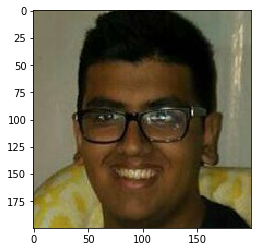

In [9]:
image = []
image.append(imread(r'face.jpg'))
image=np.array(image)
imshow(image[0])

In [ ]:
print(model.predict(image))

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())